# Univariate Gaussian MLE

## Problem Statement

I have $n=100$ pieces of indepdendent and identicially distrubuted (i.i.d) data related to some measurement that is drawn from a **normal distribution**.

Task: Compute $\mu_{MLE}$ and $\sigma_{MLE}$, which represent the mean and standard deviation computed via MLE, respectively, of the underlying normal distribution for the dataset "MLE_dataset.npy"

## Variable Definitions

1. x = collection of data points ($x_1,x_2,...,x_n$). Loaded in as a numpy array of shape (100,)
2. $\mu$ = mean of the normal distribution
3. $\sigma$ = standard deviation of the normal distribution

## Dataset

1. You are given "MLE_dataset.npy" which contains the aforementioned data in the form of a numpy array.

3. We assume for a single piece of data, $x_i$, the data is drawn from a normal distribution, and the likelihood of that data given a normal distribution with parameterized by $\mu$ and $\sigma^2$ can be represented as:

$$p(x_i | \mu, \sigma^2) = \mathcal{N}(x_i; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} * \text{exp} \ [-\frac{1}{2}(\frac{x_i - \mu}{\sigma})^2]$$

4. There are $n=100$ observations. Because the observations are **independent** (or we assume them to be, at least), we can represent our likelihood function for all observations as the product of the individual observations:

$$p(x | \mu, \sigma^2) = \Pi_{i=1}^N \mathcal{N}(x_i; \mu, \sigma^2) = (\frac{1}{2\pi\sigma^2})^{n/2} * \text{exp} \ [-\frac{1}{2}\sum_{i=1}^N (\frac{x_i - \mu}{\sigma})^2]$$

## MLE estimates for $\mu$ and $\sigma^2$ 

$$\mu_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$$

$$ \sigma^2_{MLE} = \frac{1}{n} \sum_{i=1}^n(x_i-\mu_{MLE})^2$$


## Goal

Find $\mu_{MLE}$ and $\sigma_{MLE}$ for the data set "MLE_dataset.npy"

In [8]:
import scipy.stats
import numpy as np


def load(path):
    '''
    loads "MLE_dataset.npy" given its path into variable 'dataset'. returns 'dataset'
    '''
    dataset = np.load(path)
    return dataset
    
def MLE(dataset):
    '''
    Input:
        dataset - numpy array of shape (100,) - containing the data drawn from unknown gaussian
        
    Output:
        mu - float - MLE estimate of mu based on data
        sigma - float - MLE estimate of sigma based on data
    '''
    
    mu = 0
    sigma = 0
    
    mu = (1/np.prod(np.shape(dataset)))*np.sum(dataset)
    sigma = np.sqrt((1/np.prod(np.shape(dataset)))*np.sum((dataset - mu)**2))
    
    
    return mu, sigma

dataset = load("./MLE_dataset.npy")
mu_sigma = MLE(dataset)

print(mu_sigma)

(102.65639598061983, 9.7432536191923)
102.65639598061983
9.7432536191923


# Univariate Gaussian EM

## Problem Statement

For this problem, there is a brand new data set consisting of $n=200$ data points. These data points are drawn from **one of two unknown gaussian distributions**.

To keep the notation consistent, the subscript ID $k = \{0,1\}$ is used to represent which gaussian a parameter/variable is referring to.

## Variable definitions

1. $k$: id of the gaussian distributions. {0,1} 
2. $n$: number of data points. 200 in this case
3. $\mu_k$: the mean of normal distribution $k$
4. $\sigma_k$: the std of normal distribution $k$
5. $\pi_k$: the prior probability of normal distribution $k$
7. $t$: current step number
8. $z_i = k$: represents the idea that i-th data point was drawn from gaussian $k$
9. $x_i$: i-th data point

## Task Description:

**Unknowns:**
1. The true means, $\mu_0$ and $\mu_1$ for both gaussian distributions
2. The true standard deviations, $\sigma_0$ and $\sigma_1$ for both gaussian distributions 
3. Which gaussian distribution, $k=0$ or $k=1$, a point, $x_i$, came from.
4. The true fraction of our points that came from gaussian $k=0$ and the true fraction of our points that came from gaussian $k=1$ (the prior probabilities)

Goal: implement an algorithm that implements EM and returns the following:

1. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate the mean, standard deviation (std), and prior of the first gaussian with ID $k=0$
2. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate of the mean, standard deviation (std), and prior of the first gaussian with ID $k=1$


## E - Step
$P(z_i = k | x_i, \theta_k^t)$ reflects the responsibility the k-th gaussian has for the i-th data point
$$P(z_i = k | x_i, \theta_k^t) = \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{P(x_i | \theta_k^t)}$$ \
$$= \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{\sum_{k=0}^{1}P(x_i | z_i = k, \theta_k^t)*\pi_k^t}$$



## M - Step


$$\mu_k^{t+1} = \ ??$$

$$\sigma_k^{t+1} = \ ??$$

$$\pi_k^{t+1} = \frac{\sum_{i=1}^n P(z_i = k | x_i, \theta_k^t)}{n}$$





Update rule for $\mu_k$:

$\mu_k^{t+1}$ = $\dfrac{\sum_{i=0}^{n}P(z_i = k|x_i,\theta_k^t)*x_i}{\sum_{i=0}^{n}P(z_i = k|x_i,\theta_k^t)}$


Update rule for $\sigma_k$:

$\sigma_k^{t+1}$ = $\dfrac{\sum_{i=0}^{n}P(z_i = k|x_i,\theta_k^t)*\sqrt{(x_i-\mu_k)^2}}{\sum_{i=0}^{n}P(z_i = k|x_i,\theta_k^t)}$

[0.41655257 0.58344743] [100 202] [18 15]


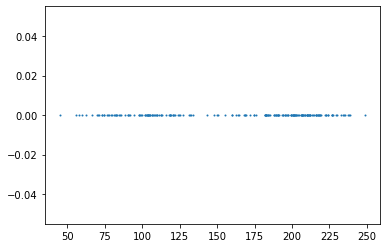

In [30]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

def load(path):
    dataset = np.load(path)
    return dataset

def em(dataset, k, n_iterations):
    '''
    Input:
        dataset - np array - containing the data
        k - int - representing the number of underlying gaussian distributions
        n_iterations - int - representing number of iterations EM should run for
        
    output:
        mus - np array shape (2,) - mus[k] is the EM estimate of the mean of the kth gaussian
        sigmas - np array shape (2,) - sigmas[k] is the EM estimate of the stdev of the kth gaussian
        pi - np array shape (2,) - pis[j] is the EM estimate of the prior of the kth gaussian
    '''
    n_samples = dataset.shape[0]

    # Initialization of parameter estimates (will change result/convergence to local maxima)
    FINAL_INITIAL_MUS = np.asarray([90, 210]) 
    FINAL_INITIAL_SIGMAS = np.asarray([28,19]) 
    FINAL_INITIAL_PIS = np.asarray([0.3,.7]) 
    pis = FINAL_INITIAL_PIS 
    mus = FINAL_INITIAL_MUS 
    sigmas = FINAL_INITIAL_SIGMAS 
            
    for em_iter in (range(n_iterations)):
            #E Step

            likelihood0 = (scipy.stats.norm(mus[0],sigmas[0]).pdf(dataset)*pis[0])/(scipy.stats.norm(mus[0],sigmas[0]).pdf(dataset)*pis[0] + scipy.stats.norm(mus[1],sigmas[1]).pdf(dataset)*pis[1])
            likelihood1 = (scipy.stats.norm(mus[1],sigmas[1]).pdf(dataset)*pis[1])/(scipy.stats.norm(mus[0],sigmas[0]).pdf(dataset)*pis[0] + scipy.stats.norm(mus[1],sigmas[1]).pdf(dataset)*pis[1])
            
            #M step
            pis[0] = sum(likelihood0)/np.prod(np.shape(dataset))
            pis[1] = sum(likelihood1)/np.prod(np.shape(dataset))
            mus[0] = sum(likelihood0*dataset)/sum(likelihood0)
            mus[1] = sum(likelihood1*dataset)/sum(likelihood1)
            sigmas[0] = sum(likelihood0*np.sqrt((dataset-mus[0])**2))/sum(likelihood0)
            sigmas[1] = sum(likelihood1*np.sqrt((dataset-mus[1])**2))/sum(likelihood1)

    return pis, mus, sigmas

def main():
    
    n_iterations = 20 # Number of iterations that E-M algorithm will run 
    k = 2 # Number of underlying gaussians in dataset
                                                                                                                                                  
    dataset = np.load("EM_dataset.npy")
    pis, mus, sigmas = em(dataset, k, n_iterations)
    print(pis, mus, sigmas)
    plt.scatter(dataset, np.zeros([1,200]),1)
    
main()

0.41655257060864087


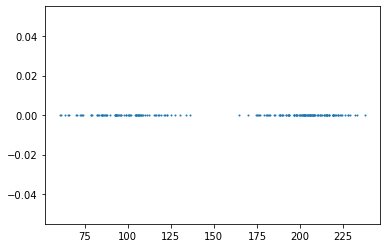

In [46]:
z = np.zeros(200)
dataset = np.load("EM_dataset.npy")
pis, mus, sigmas = em(dataset, 2, 20)
print(pis[0])
for i in range(200):
    
    flip = np.random.binomial(size=1,n=1,p=pis[0])
    if flip == 1:
        z[i] = np.random.normal(mus[0],sigmas[0],1)
    else:
        z[i] = np.random.normal(mus[1],sigmas[1],1)

plt.scatter(z, np.zeros([1,200]),1)